In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

### Cleaning/Formating Data

In [2]:
customers = pd.read_csv('marketing_campaign', sep="\t")

In [3]:
customers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
## Checking for null values 
customers.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
## filling null values in income column with the mean of the column
customers['Income'].fillna(customers['Income'].mean(), inplace=True)

In [6]:
customers.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
customers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
## check datatype formats
customers.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
## convert dt_customer column to accurate data type(Datetime)
customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'])

In [10]:
## create new column age for customers age, using 2019 as the current year
customers['Age'] = 2019 - customers['Year_Birth']

## create new column for customers age at the company using 2019 as the current year
customers['year_joined'] = customers['Dt_Customer'].dt.year
customers['customer_since'] = 2019 - customers['year_joined']

In [11]:
## working of the education column for better understanding.
customers['Education'] = customers['Education'].replace(['PhD', 'Master', '2n Cycle'], 'Advanced Education')
customers['Education'] = customers['Education'].replace(['Basic', 'Graduation'], 'Basic Education')

In [12]:
## working of the marital status column for better understanding.
customers['Marital_Status'] = customers['Marital_Status'].replace(['Single', 'Alone', 'Divorced', 'Widow', 'Absurd', 'YOLO'], 'Single')
customers['Marital_Status'] = customers['Marital_Status'].replace(['Married', 'Together'], 'In Relationship')

In [13]:
## removing outliners in age columns
customers.drop(customers.loc[customers['Age'] > 80].index, inplace=True)

In [14]:
customers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'year_joined', 'customer_since'],
      dtype='object')

In [15]:
## summing the values of items bought
customers[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [16]:
## summing up the expenses on the customers 
customers['TotalSpent'] = customers['MntWines']+customers['MntFruits']+customers['MntMeatProducts']+customers['MntFishProducts']+customers['MntSweetProducts']+customers['MntGoldProds']                   

In [17]:
customers[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10
3,2,2,0,4
4,5,5,3,6
...,...,...,...,...
2235,2,9,3,4
2236,7,8,2,5
2237,1,2,3,13
2238,2,6,5,10


In [18]:
## summing up the number of purchases by customers and adding it to a new column 
customers['TotalPurchased'] = customers['NumDealsPurchases']+customers['NumWebPurchases']+customers['NumCatalogPurchases']+customers['NumStorePurchases']

In [19]:
customers[['Kidhome', 'Teenhome']]

,Kidhome,Teenhome
0,0,0
1,1,1
2,0,0
3,1,0
4,1,0
...,...,...
2235,0,1
2236,2,1
2237,0,0
2238,0,1


In [20]:
## summing values in kids and teens column
customers['TotalKids'] = customers['Kidhome']+customers['Teenhome']

In [21]:
customers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'year_joined', 'customer_since', 'TotalSpent', 'TotalPurchased',
       'TotalKids'],
      dtype='object')

## Quick EDA

In [22]:
customers_q = customers[['ID', 'Year_Birth', 'Age', 'customer_since', 'Education', 
           'Marital_Status', 'Income','TotalKids', 'TotalSpent', 'TotalPurchased', 'Complain']]

In [23]:
customers_q

,ID,Year_Birth,Age,customer_since,Education,Marital_Status,Income,TotalKids,TotalSpent,TotalPurchased,Complain
0,5524,1957,62,7,Basic Education,Single,58138.0,0,1617,25,0
1,2174,1954,65,5,Basic Education,Single,46344.0,2,27,6,0
2,4141,1965,54,6,Basic Education,In Relationship,71613.0,0,776,21,0
3,6182,1984,35,5,Basic Education,In Relationship,26646.0,1,53,8,0
4,5324,1981,38,5,Advanced Education,In Relationship,58293.0,1,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,52,6,Basic Education,In Relationship,61223.0,1,1341,18,0
2236,4001,1946,73,5,Advanced Education,In Relationship,64014.0,3,444,22,0
2237,7270,1981,38,5,Basic Education,Single,56981.0,0,1241,19,0
2238,8235,1956,63,5,Advanced Education,In Relationship,69245.0,1,843,23,0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

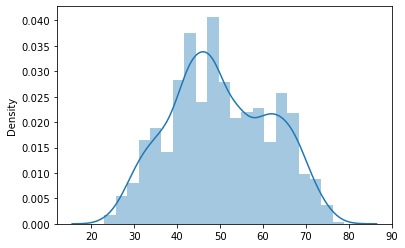

In [24]:
##The age distributions of customers in the company
sns.distplot(x=customers_q['Age'])

<AxesSubplot:xlabel='Age', ylabel='customer_since'>

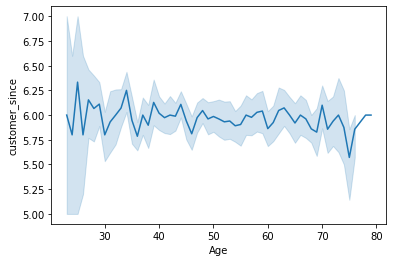

In [25]:
## Age distribution of the customers that are old in the company
sns.lineplot(x='Age', y='customer_since', data=customers_q)

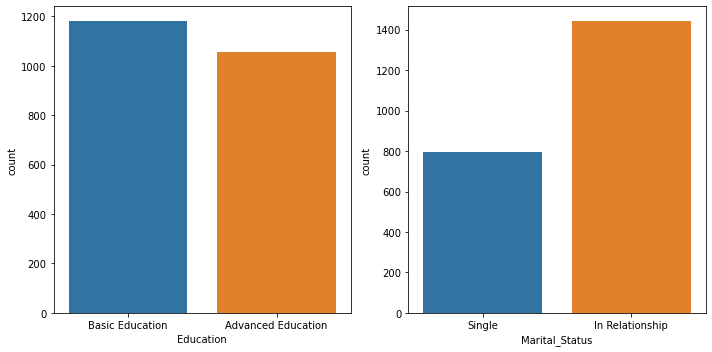

In [26]:
fig = plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
## education distribution
sns.countplot(x='Education', data=customers_q)

## marital status
plt.subplot(1,2,2)
## education distribution
sns.countplot(x='Marital_Status', data=customers_q)

plt.tight_layout()

In [27]:
customers_q.head()

,ID,Year_Birth,Age,customer_since,Education,Marital_Status,Income,TotalKids,TotalSpent,TotalPurchased,Complain
0,5524,1957,62,7,Basic Education,Single,58138.0,0,1617,25,0
1,2174,1954,65,5,Basic Education,Single,46344.0,2,27,6,0
2,4141,1965,54,6,Basic Education,In Relationship,71613.0,0,776,21,0
3,6182,1984,35,5,Basic Education,In Relationship,26646.0,1,53,8,0
4,5324,1981,38,5,Advanced Education,In Relationship,58293.0,1,422,19,0


<AxesSubplot:xlabel='Age', ylabel='Income'>

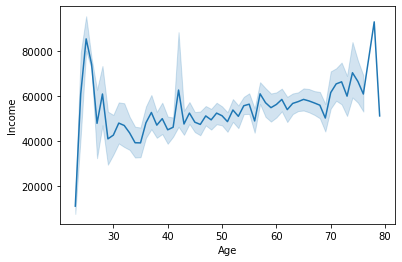

In [28]:
## Age distribution of the customers and income
sns.lineplot(x='Age', y='Income', data=customers_q)

<AxesSubplot:xlabel='Age', ylabel='TotalPurchased'>

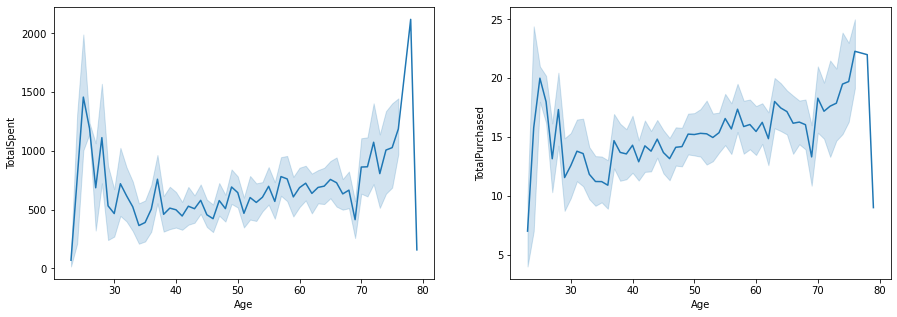

In [29]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x='Age', y='TotalSpent', data=customers_q)

plt.subplot(1,2,2)
sns.lineplot(x='Age', y='TotalPurchased', data=customers_q)

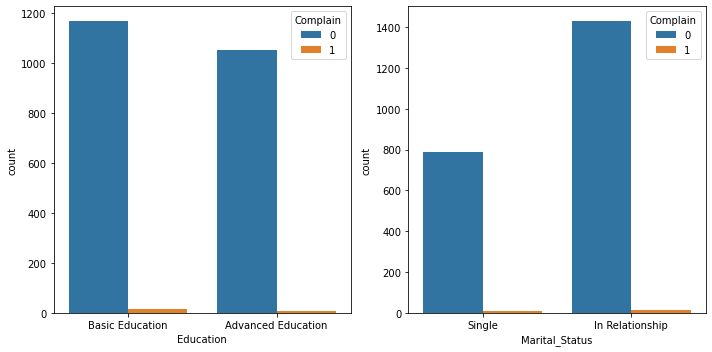

In [30]:
fig = plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
## education distribution of customers that complain
sns.countplot(x='Education', hue='Complain', data=customers_q)

## marital status
plt.subplot(1,2,2)
## education distribution of customers that complain
sns.countplot(x='Marital_Status', hue='Complain', data=customers_q)

plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='count'>

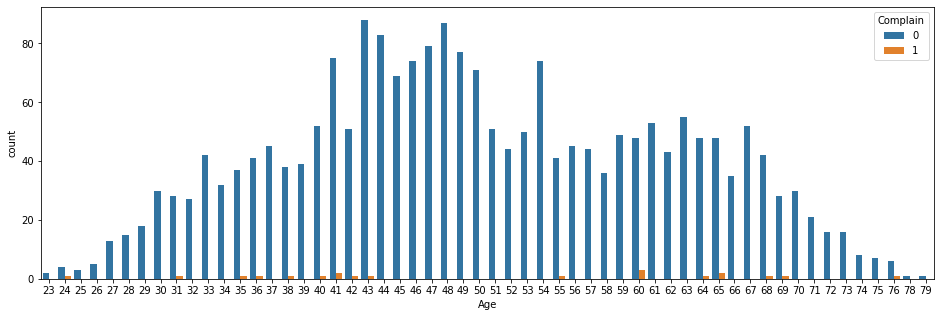

In [31]:
fig = plt.figure(figsize=(16,5))

## age distribution of customers that complain
sns.countplot(x='Age', hue='Complain', data=customers_q)

<AxesSubplot:>

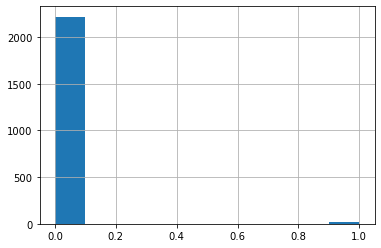

In [32]:
## distribution of customers that complained 
customers_q['Complain'].hist()

In [33]:
## number of customers of customers that complained
customers_q['Complain'].value_counts()

0    2217
1      20
Name: Complain, dtype: int64

### Model building

In [34]:
customers_q

,ID,Year_Birth,Age,customer_since,Education,Marital_Status,Income,TotalKids,TotalSpent,TotalPurchased,Complain
0,5524,1957,62,7,Basic Education,Single,58138.0,0,1617,25,0
1,2174,1954,65,5,Basic Education,Single,46344.0,2,27,6,0
2,4141,1965,54,6,Basic Education,In Relationship,71613.0,0,776,21,0
3,6182,1984,35,5,Basic Education,In Relationship,26646.0,1,53,8,0
4,5324,1981,38,5,Advanced Education,In Relationship,58293.0,1,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,52,6,Basic Education,In Relationship,61223.0,1,1341,18,0
2236,4001,1946,73,5,Advanced Education,In Relationship,64014.0,3,444,22,0
2237,7270,1981,38,5,Basic Education,Single,56981.0,0,1241,19,0
2238,8235,1956,63,5,Advanced Education,In Relationship,69245.0,1,843,23,0


In [35]:
education = pd.get_dummies(customers_q['Education'], drop_first=True)
education.head()

,Basic Education
0,1
1,1
2,1
3,1
4,0


In [36]:
marital_status = pd.get_dummies(customers_q['Marital_Status'], drop_first=True)
marital_status.head()

,Single
0,1
1,1
2,0
3,0
4,0


In [37]:
customers_q = pd.concat([customers_q, education, marital_status], axis=1)

In [38]:
X = customers_q.drop(['Education', 'ID', 'Marital_Status'], axis=1)
y = customers_q['Complain']

In [40]:
## balancing the data.
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape')
print(y.value_counts())
print('\n')
print('Resample dataset shape')
print(y_ros.value_counts())

Original dataset shape
0    2217
1      20
Name: Complain, dtype: int64


Resample dataset shape
1    2217
0    2217
Name: Complain, dtype: int64


In [41]:
## split data
from sklearn.model_selection import train_test_split

In [42]:
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=101)

In [43]:
print('shape of X train :', X_ros_train.shape)
print('shape of X test :', X_ros_test.shape)
print('\n')
print('shape of y train :', y_ros_train.shape)
print('shape of y test :', y_ros_test.shape)

shape of X train : (3103, 10)
shape of X test : (1331, 10)


shape of y train : (3103,)
shape of y test : (1331,)


In [44]:
## support vector machine model
from sklearn.svm import SVC
model_svc = SVC()

model_svc.fit(X_ros_train, y_ros_train)
predictions = model_svc.predict(X_ros_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_ros_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       668
           1       0.59      0.65      0.62       663

    accuracy                           0.60      1331
   macro avg       0.60      0.60      0.60      1331
weighted avg       0.60      0.60      0.60      1331



In [45]:
## logistics regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

model_log.fit(X_ros_train, y_ros_train)
predictions = model_log.predict(X_ros_test)

print(classification_report(y_ros_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       668
           1       0.60      0.78      0.68       663

    accuracy                           0.63      1331
   macro avg       0.64      0.63      0.62      1331
weighted avg       0.64      0.63      0.62      1331



In [46]:
## KNN model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

model_knn.fit(X_ros_train, y_ros_train)
predictions = model_knn.predict(X_ros_test)

print(classification_report(y_ros_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       668
           1       0.97      1.00      0.98       663

    accuracy                           0.98      1331
   macro avg       0.98      0.98      0.98      1331
weighted avg       0.98      0.98      0.98      1331

